#### Jorge Eduardo Rondón Ruiz - jerondonr@unal.edu.co
#### Ingeniero electrónico
#### Universidad Nacional de Colombia

***


# <center>Regresión lineal</center>

**1. Introducción**

La necesidad creciente de los seres humanos de mejorar los aspectos de su vida cotidiana, lo obligan constantemente a encontrar significado a cada uno de los acontecimientos que los rodea, ya que sin esta comprensión, sería solo cuestión de azar que pudieran encontrar el mejoramiento deseado. En este camino, diariamente se desarrolla una gran cantidad de conocimiento de diferentes tipos, lo que genera una gran cantidad de datos, que de ser analizados adecuadamente, sería muy posible encontrar solución a los problemas encontrados. Sin embargo, debido a que en ocasiones el análisis de gran cantidad de datos se torna algo complejo, se han desarrollado gran cantidad de teorias que facilitan su procesamiento. La Regresión lineal es un metodo para el análisis de datos ampliamente conocido, que permite encontrar relaciones aproximadas entre las variables de interes. A lo largo de este documento se aplicará este concepto para encontrar la relación que existe entre dos variables de interes que han sido obtenidos de un set de datos de videos de youtube.

**2. Breve historia**

El método de los minimos cuadrados es quizas la primera forma de regresión lineal en la cual trabajaron personasjes historicos conocidos como Legendre y Gauss.
Existe una gran variedad de técnicas de regresión, por lo que la regresión lineal es un caso particular que intenta modelar de forma rapida y aproximada el conjunto de datos de interes [1].

<img src="Gauss.jpeg">


**3. El planteamiento del algortimo**

El algoritmo de regresión lineal consiste en encontrar los pesos de una ecuación matematica que sea capaz de modelar en una linea el comportamiento de los datos analizados. El modelo es de la forma:

$$y=\beta_0 + \beta_1*X_1 + ... + \beta_m*X_m$$
$$y=\beta_0 + \sum^{m}_{j=1} \beta_j*X_j$$

en donde $\beta_0$, ... ,$\beta_m$ son los valores que se encontrarán con el metodo y $X_0$, ... , $X_m$ son los datos de entrada del modelo.

Dependiendo de la forma de los datos, se deberá usar una mayor o menor cantidad de pesos para que el resultado de la regresión describa apropiadamente el comportamiento de los datos [1].

![CPU](https://i1.wp.com/www.pacorabadan.com/wp-content/uploads/2015/11/1280px-Linear_regression.svg_.png?fit=1280%2C845&ssl=1 "CPU: Unidad Central de Proceso. Tomado de [1]")

**4. Desarrollar un ejemplo de regresión lineal, con datos reales**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

folder_path='/home/jorgerondon/Documentos/InteligenciaArtificial/DiplomadoIA/CuadernosJupyterJorgeE/datosRegresionLineal/USvideos.csv'
df= pd.read_csv(folder_path)
for i in df.index:
    if (i>10000):
        df.drop(i, inplace = True)
#df.plot(kind = 'scatter', x = 'likes', y = 'views')

#plt.show() 
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,IU-Fo-QEpOI,18.02.01,Dude Perfect Face Off | What's In The Box,Whistle Sports,17,2017-12-20T23:00:00.000Z,"dude perfect|""dude perfect christmas""|""dude pe...",3095325,40946,1082,2472,https://i.ytimg.com/vi/IU-Fo-QEpOI/default.jpg,False,False,False,This Twin Battle is sponsored by Dollar Shave ...
9997,6hb0GOOFQwI,18.02.01,MST3K (2017) Yule Log,MYSTERY SCIENCE THEATER 3000,23,2017-12-22T00:53:08.000Z,"mst3k|""mystery science theater""|""tom servo""|""c...",24296,828,63,82,https://i.ytimg.com/vi/6hb0GOOFQwI/default.jpg,False,False,False,Enjoy this MST3K Yule Log!\n\nWelcome to the o...
9998,YEGhKwpEKEw,18.02.01,TITANIC TRANSFORMATION! THE ROSE LOOK FEAT. GU...,Lisa Eldridge,26,2017-12-21T17:03:31.000Z,"Lisa Eldridge|""Lisa Elridge""|""Lisa Eldrige""|""M...",476030,20712,254,1130,https://i.ytimg.com/vi/YEGhKwpEKEw/default.jpg,False,False,False,Follow me on instagram here http://instagram.c...
9999,AaALLWQmCdI,18.02.01,Making new sounds using artificial intelligence,ANDREW HUANG,10,2017-12-21T15:30:00.000Z,"andrew|""huang""|""andrew huang""|""music""|""musicia...",129318,9577,103,1498,https://i.ytimg.com/vi/AaALLWQmCdI/default.jpg,False,False,False,RAINBOWGRAM stream/download:\nSpotify https://...


In [2]:
df.sort_values(by=['views'], inplace=True)
xViews_train = np.array(df['views'])
yLikes_train = np.array(df['likes'])
print(xViews_train)
print(yLikes_train)

[      687       704       773 ... 125432237 137843120 149376127]
[     10      10       2 ... 2912702 3014471 3093544]


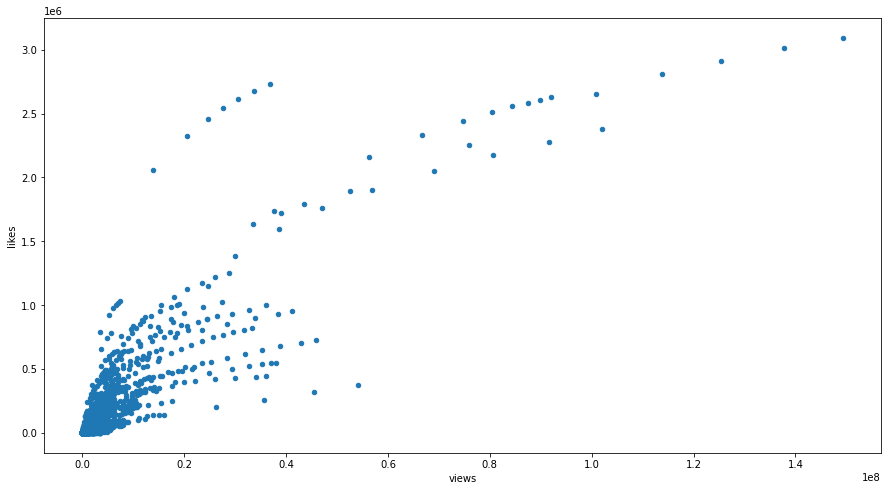

In [3]:
df.plot(kind = 'scatter', x = 'views', y = 'likes',figsize=(15,8))
plt.show() 

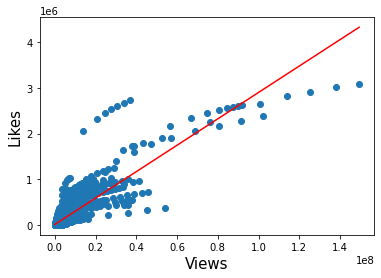

El valor de a es:  0.028898491006804774 El valor de b es:  9937.470772864572


In [4]:
a,b =np.polyfit(xViews_train,yLikes_train, deg=1)
yMod= a*xViews_train+b
fig, var=plt.subplots()
var.plot(xViews_train,yLikes_train, 'o')
var.plot(xViews_train,yMod, '-', color='r')
plt.xlabel("Views",fontsize=15)
plt.ylabel("Likes", fontsize=15)
plt.show()
print("El valor de a es: ",a,"El valor de b es: ",b)

In [9]:
ecm=np.mean((yMod-yLikes_train)**2) #Función de perdidad para el modelo lineal y=ax+b
print("El error cuadratico medio es: ",ecm)

El error cuadratico medio es:  6465289636.03151


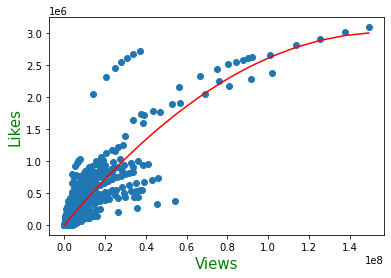

El valor de a es:  -1.216370235878307e-10 El valor de b es:  0.03826818668377105 El valor de c es:  1109.3751514538915


In [10]:
a,b,c =np.polyfit(xViews_train,yLikes_train, deg=2)
yMod= a*xViews_train**2 + b*xViews_train + c
fig, var=plt.subplots()
var.plot(xViews_train,yLikes_train, 'o')
var.plot(xViews_train,yMod, '-', color='r')
plt.xlabel("Views",fontsize=15, c='g')
plt.ylabel("Likes",fontsize=15, c='g')
plt.show()
print("El valor de a es: ",a, "El valor de b es: ",b,"El valor de c es: ",c)

### Función de perdida

In [11]:
ecm=np.mean((yMod-yLikes_train)**2)
print("El error cuadratico medio es: ",ecm)

El error cuadratico medio es:  5679527557.375971


**5. Conclusiones**


1. Al observar el modelo obtenido con la regresión lineal se puede ver que sería ideal aumentar su cantidad de dimensiones. Esto es debido a que para valores bajos de la variable "Views" tenemos un comportamiento de la variable de interes "Likes" que parece depender en gran medida de otra variable.

2. Se puede observar que con el cambio de modelo (y=ax+b => y=ax^2+bx+c) el ECM disminuye, por lo que se puede comprobar que este es un modelo mas apropiado.

6. Referencias

[1] https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal

[2] https://www.celeberrima.com/como-escribir-sumatorias-en-latex/